In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-data/Weather Data.csv
/kaggle/input/weather-test/weather-test.csv


In [2]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/weather-data/Weather Data.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# PREPROCESSING

In [4]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [5]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

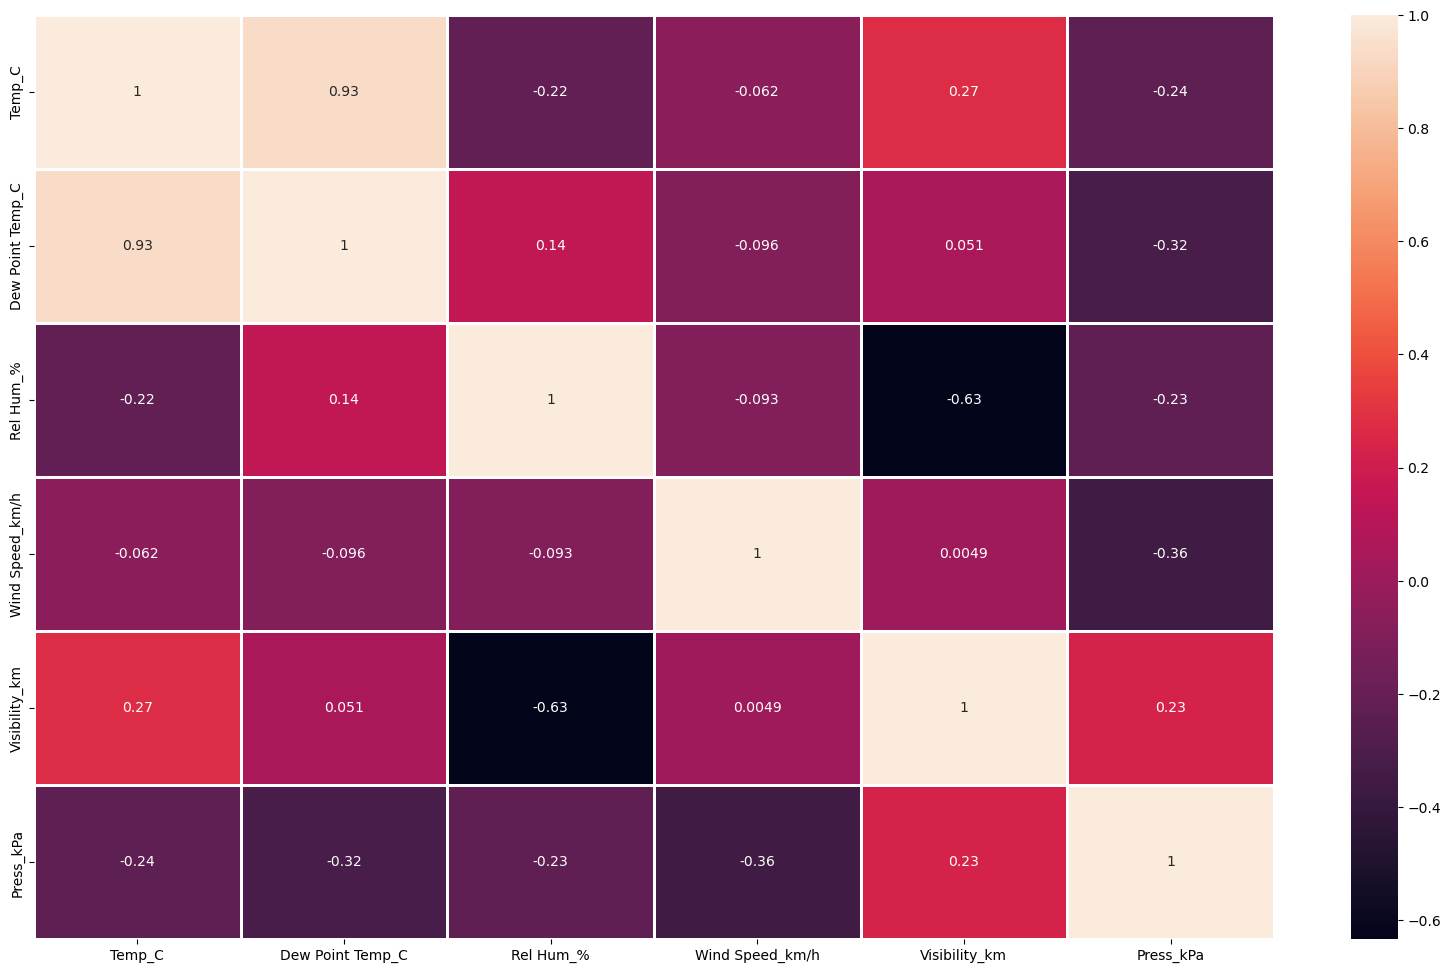

In [6]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

In [7]:
df.drop(["Date/Time"],inplace=True,axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Weather"]=le.fit_transform(df["Weather"])

In [9]:
x=df.iloc[:,:-1]
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [10]:
y=df.iloc[:,-1]
y

0        7
1        7
2        9
3        9
4        7
        ..
8779    35
8780    35
8781    35
8782    35
8783    35
Name: Weather, Length: 8784, dtype: int64

# BALANCING 

In [11]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)

In [12]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.38188277, 0.46502836, 0.82926829, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.46880907, 0.84146341, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.47448015, 0.86585366, 0.08433735, 0.07900208,
        0.61011419],
       ...,
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827]])

# splitting to test and train data

In [13]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

# CLASSIFICATION MODELS

In [14]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([49, 14,  2, ...,  4, 14,  2])

In [15]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       205
           1       0.68      0.58      0.62       203
           2       0.97      1.00      0.98       212
           3       1.00      1.00      1.00       224
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00       182
           7       0.98      1.00      0.99       228
           8       1.00      1.00      1.00       219
           9       1.00      1.00      1.00       188
          10       1.00      1.00      1.00       195
          11       1.00      1.00      1.00       211
          12       1.00      1.00      1.00       212
          13       1.00      1.00      1.00       238
          14       1.00      1.00      1.00       212
          15       1.00      1.00      1.00       195
          16       1.00      1.00      1.00       210
          17       1.00    

In [16]:
# ==============================
# Save trained model and predict on test data
# ==============================

import joblib

# Save the best performing KNN model (knn1 in your case)
model_path = "/kaggle/working/knn_model.pkl"
joblib.dump(knn1, model_path)
print(f"✅ Model saved to {model_path}")

# ------------------------------
# Load the test dataset
# ------------------------------
test_df = pd.read_csv("/kaggle/input/weather-test/weather-test.csv")

# Drop Date/Time if present
if "Date/Time" in test_df.columns:
    test_df.drop(["Date/Time"], inplace=True, axis=1)

# Encode categorical 'Weather' column if present (should not be in test inputs, but safeguard)
if "Weather" in test_df.columns:
    test_df.drop("Weather", axis=1, inplace=True)

# Apply the same scaling as training
X_test_final = ms.transform(test_df)

# Predict using the trained model
test_preds = knn1.predict(X_test_final)

# Inverse transform to get original Weather labels
predicted_weather = le.inverse_transform(test_preds)

# Save predictions to CSV
output_df = test_df.copy()
output_df["Predicted_Weather"] = predicted_weather

output_path = "/kaggle/working/weather_predictions.csv"
output_df.to_csv(output_path, index=False)
print(f"✅ Predictions saved to {output_path}")

# Display first few predictions
output_df.head()


✅ Model saved to /kaggle/working/knn_model.pkl
✅ Predictions saved to /kaggle/working/weather_predictions.csv


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Predicted_Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [17]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
y_pred2

array([49, 14, 24, ...,  4, 14,  2])

In [18]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.46      0.66      0.55       205
           1       0.41      0.08      0.14       203
           2       0.60      0.83      0.69       212
           3       0.64      0.67      0.66       224
           4       0.96      1.00      0.98       233
           5       0.98      1.00      0.99       213
           6       0.88      1.00      0.94       182
           7       0.63      0.61      0.62       228
           8       0.69      0.85      0.76       219
           9       0.96      1.00      0.98       188
          10       0.99      1.00      1.00       195
          11       0.77      0.68      0.72       211
          12       0.99      1.00      0.99       212
          13       0.67      0.58      0.62       238
          14       0.75      1.00      0.86       212
          15       1.00      1.00      1.00       195
          16       1.00      1.00      1.00       210
          17       1.00    

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

# --- Train SVC ---
sv = SVC(C=10, gamma=1, kernel='rbf', probability=True, random_state=42)
sv.fit(X_train, y_train)

# --- Predict on test split ---
y_pred_svc = sv.predict(X_test)

# Evaluation
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc, target_names=le.classes_))

# Save trained model
svc_model_path = "/kaggle/working/svc_model.pkl"
joblib.dump(sv, svc_model_path)
print(f"✅ SVC model saved to {svc_model_path}")

# --- Predict on external test dataset ---
test_df = pd.read_csv("/kaggle/input/weather-test/weather-test.csv")

# Drop Date/Time if present
if "Date/Time" in test_df.columns:
    test_df.drop(["Date/Time"], inplace=True, axis=1)

# Drop Weather column if present (target not used during prediction)
if "Weather" in test_df.columns:
    test_df.drop("Weather", axis=1, inplace=True)

# Scale using same scaler
X_test_final = ms.transform(test_df)

# Predict categorical Weather classes
svc_preds = sv.predict(X_test_final)

# Decode back to original Weather labels
weather_labels = le.inverse_transform(svc_preds)

# Save predictions
output_df = test_df.copy()
output_df["SVC_Predicted_Weather"] = weather_labels

output_path = "/kaggle/working/weather_predictions_svc.csv"
output_df.to_csv(output_path, index=False)
print(f"✅ SVC categorical predictions saved to {output_path}")

# Preview first few rows
output_df.head()


SVC Accuracy: 0.8422602089268756
                                         precision    recall  f1-score   support

                                  Clear       0.46      0.66      0.55       205
                                 Cloudy       0.41      0.08      0.14       203
                                Drizzle       0.60      0.83      0.69       212
                            Drizzle,Fog       0.64      0.67      0.66       224
                Drizzle,Ice Pellets,Fog       0.96      1.00      0.98       233
                           Drizzle,Snow       0.98      1.00      0.99       213
                       Drizzle,Snow,Fog       0.88      1.00      0.94       182
                                    Fog       0.63      0.61      0.62       228
                       Freezing Drizzle       0.69      0.85      0.76       219
                   Freezing Drizzle,Fog       0.96      1.00      0.98       188
                  Freezing Drizzle,Haze       0.99      1.00      1.00     

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,SVC_Predicted_Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [20]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
y_pred2

array([49,  8,  2, ...,  4, 42, 31])

In [21]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.45      0.36      0.40       205
           1       0.24      0.03      0.06       203
           2       0.50      0.62      0.55       212
           3       0.53      0.38      0.44       224
           4       1.00      1.00      1.00       233
           5       0.98      1.00      0.99       213
           6       0.52      1.00      0.68       182
           7       0.44      0.21      0.28       228
           8       0.31      0.45      0.36       219
           9       0.47      0.34      0.40       188
          10       1.00      1.00      1.00       195
          11       0.36      0.32      0.34       211
          12       0.96      1.00      0.98       212
          13       0.47      0.34      0.40       238
          14       0.29      0.25      0.26       212
          15       1.00      1.00      1.00       195
          16       1.00      1.00      1.00       210
          17       1.00    

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

# --- Train GaussianNB ---
nb = GaussianNB()
nb.fit(X_train, y_train)

# --- Predict on test split ---
y_pred_nb = nb.predict(X_test)

# Evaluation
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

# Save trained model
nb_model_path = "/kaggle/working/naive_bayes_model.pkl"
joblib.dump(nb, nb_model_path)
print(f"✅ GaussianNB model saved to {nb_model_path}")

# --- Predict on external test dataset ---
test_df = pd.read_csv("/kaggle/input/weather-test/weather-test.csv")

# Drop Date/Time if present
if "Date/Time" in test_df.columns:
    test_df.drop(["Date/Time"], inplace=True, axis=1)

# Drop Weather column if present (target not used during prediction)
if "Weather" in test_df.columns:
    test_df.drop("Weather", axis=1, inplace=True)

# Scale using the same MinMaxScaler
X_test_final = ms.transform(test_df)

# Predict categorical Weather classes
nb_preds = nb.predict(X_test_final)

# Decode back to original Weather labels
weather_labels = le.inverse_transform(nb_preds)

# Save predictions
output_df = test_df.copy()
output_df["NaiveBayes_Predicted_Weather"] = weather_labels

output_path = "/kaggle/working/weather_predictions_nb.csv"
output_df.to_csv(output_path, index=False)
print(f"✅ GaussianNB categorical predictions saved to {output_path}")

# Preview first few rows
output_df.head()


GaussianNB Accuracy: 0.7081671415004749
                                         precision    recall  f1-score   support

                                  Clear       0.45      0.36      0.40       205
                                 Cloudy       0.24      0.03      0.06       203
                                Drizzle       0.50      0.62      0.55       212
                            Drizzle,Fog       0.53      0.38      0.44       224
                Drizzle,Ice Pellets,Fog       1.00      1.00      1.00       233
                           Drizzle,Snow       0.98      1.00      0.99       213
                       Drizzle,Snow,Fog       0.52      1.00      0.68       182
                                    Fog       0.44      0.21      0.28       228
                       Freezing Drizzle       0.31      0.45      0.36       219
                   Freezing Drizzle,Fog       0.47      0.34      0.40       188
                  Freezing Drizzle,Haze       1.00      1.00      1.

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,NaiveBayes_Predicted_Weather
0,-1.8,-3.9,86,4,8.0,101.24,"Freezing Drizzle,Fog"
1,-1.8,-3.7,87,4,8.0,101.24,"Freezing Drizzle,Fog"
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,"Freezing Drizzle,Fog"


In [23]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array([49, 14,  2, ...,  4, 14,  2])

In [24]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.46      0.61      0.52       205
           1       0.40      0.10      0.16       203
           2       0.75      0.88      0.81       212
           3       0.75      0.85      0.80       224
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00       182
           7       0.88      0.55      0.68       228
           8       0.79      1.00      0.88       219
           9       0.94      1.00      0.97       188
          10       1.00      1.00      1.00       195
          11       0.87      1.00      0.93       211
          12       1.00      1.00      1.00       212
          13       0.94      0.79      0.86       238
          14       0.95      1.00      0.97       212
          15       1.00      1.00      1.00       195
          16       1.00      1.00      1.00       210
          17       1.00    

Decision Tree Accuracy: 0.8922127255460589
                                         precision    recall  f1-score   support

                                  Clear       0.46      0.61      0.52       205
                                 Cloudy       0.40      0.10      0.16       203
                                Drizzle       0.75      0.88      0.81       212
                            Drizzle,Fog       0.75      0.85      0.80       224
                Drizzle,Ice Pellets,Fog       1.00      1.00      1.00       233
                           Drizzle,Snow       1.00      1.00      1.00       213
                       Drizzle,Snow,Fog       1.00      1.00      1.00       182
                                    Fog       0.88      0.55      0.68       228
                       Freezing Drizzle       0.79      1.00      0.88       219
                   Freezing Drizzle,Fog       0.94      1.00      0.97       188
                  Freezing Drizzle,Haze       1.00      1.00     

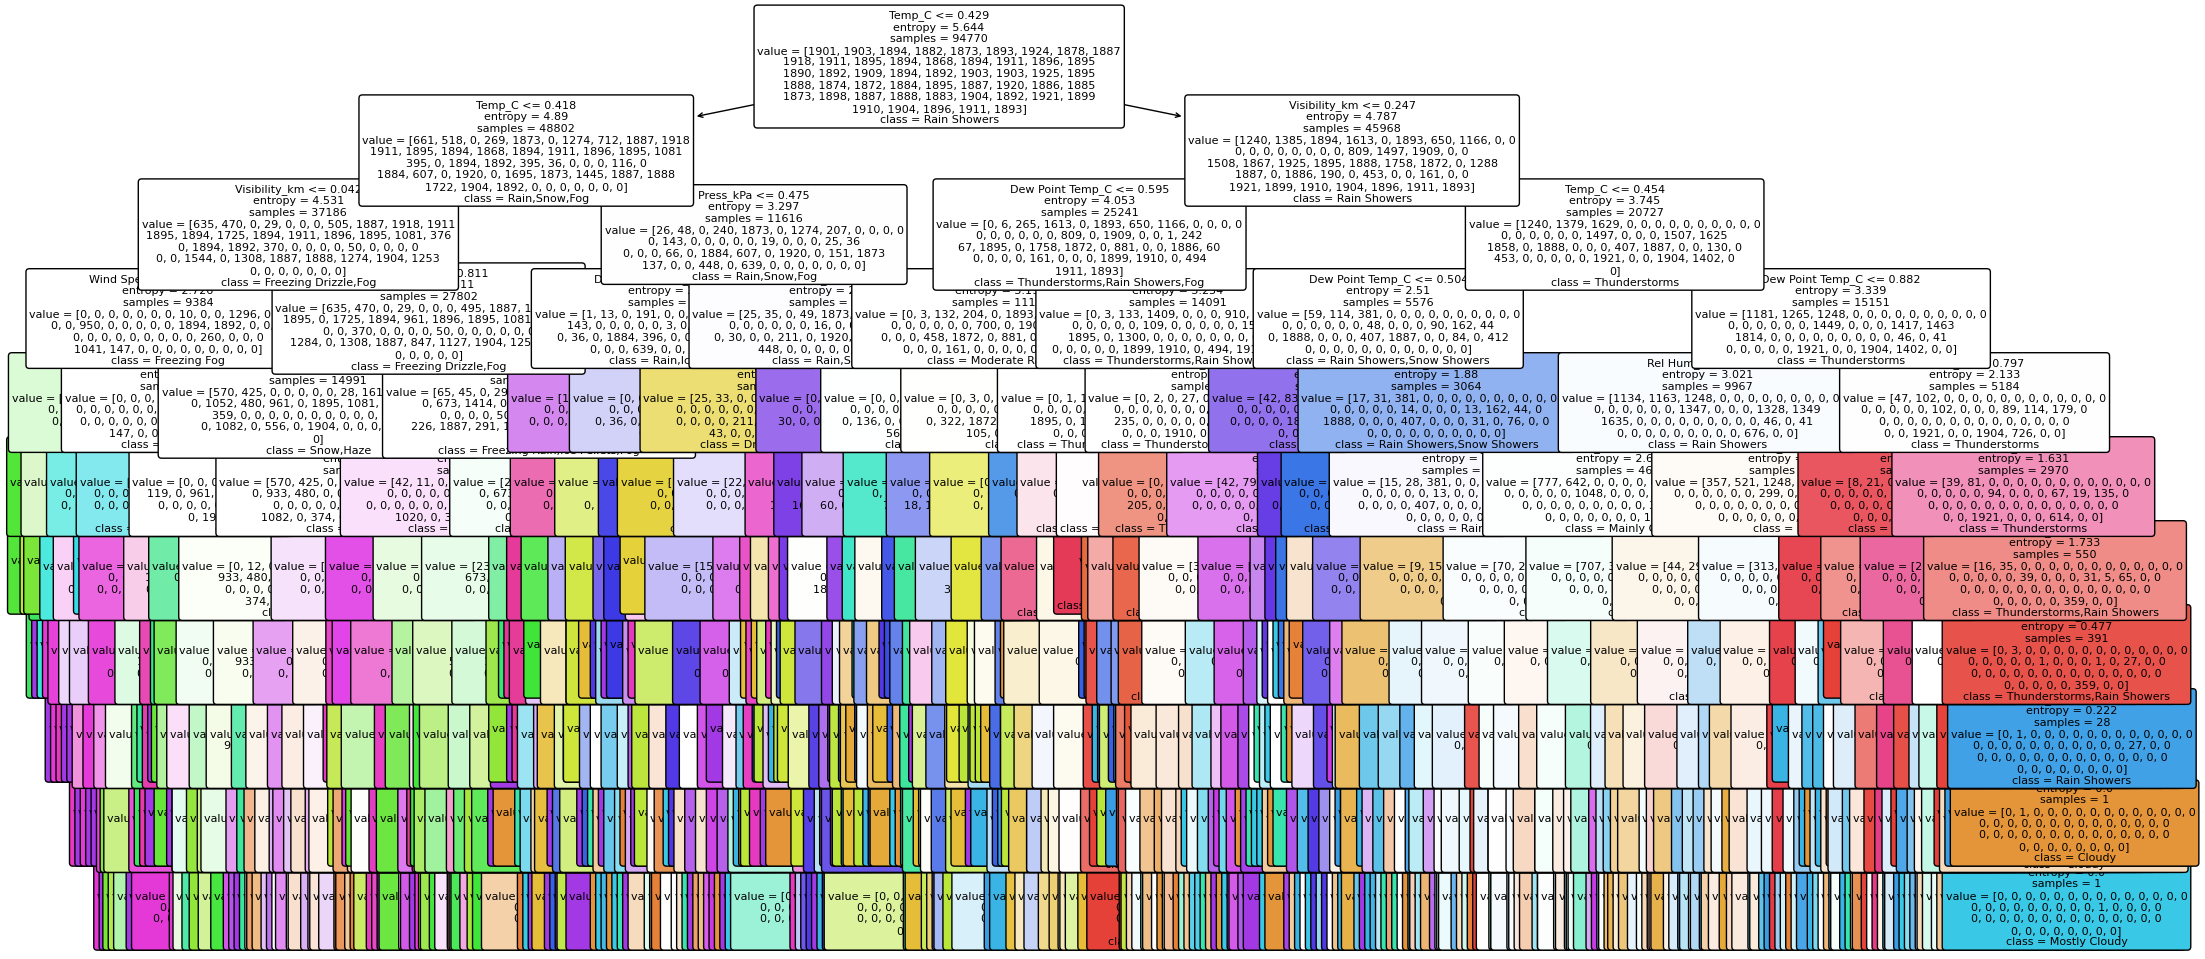

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,DecisionTree_Predicted_Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,"Freezing Drizzle,Fog"


In [25]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt

# --- Train Decision Tree ---
dt = DecisionTreeClassifier(criterion='entropy', random_state=2, max_depth=10)
dt.fit(X_train, y_train)

# --- Predict on test split ---
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Save trained model
dt_model_path = "/kaggle/working/decision_tree_model.pkl"
joblib.dump(dt, dt_model_path)
print(f"✅ Decision Tree model saved to {dt_model_path}")

# --- Predict on external test dataset ---
test_df = pd.read_csv("/kaggle/input/weather-test/weather-test.csv")

# Drop Date/Time if present
if "Date/Time" in test_df.columns:
    test_df.drop(["Date/Time"], inplace=True, axis=1)

# Drop Weather column if present (target not used during prediction)
if "Weather" in test_df.columns:
    test_df.drop("Weather", axis=1, inplace=True)

# Scale using the same MinMaxScaler
X_test_final = ms.transform(test_df)

# Predict categorical Weather classes
dt_preds = dt.predict(X_test_final)

# Decode back to original Weather labels
weather_labels = le.inverse_transform(dt_preds)

# Save predictions
output_df = test_df.copy()
output_df["DecisionTree_Predicted_Weather"] = weather_labels

output_path = "/kaggle/working/weather_predictions_dt.csv"
output_df.to_csv(output_path, index=False)
print(f"✅ Decision Tree categorical predictions saved to {output_path}")

# --- Optional: print rules ---
tree_rules = export_text(dt, feature_names=list(x.columns))
print(tree_rules)

# --- Optional: visualize the tree ---
plt.figure(figsize=(25,12))
plot_tree(dt, filled=True, feature_names=list(x.columns), class_names=le.classes_, rounded=True, fontsize=8)
plt.show()

# Preview first few rows
output_df.head()


In [26]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
y_pred4

array([49, 14,  2, ...,  4, 14,  2])

In [27]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       205
           1       0.70      0.72      0.71       203
           2       1.00      1.00      1.00       212
           3       1.00      1.00      1.00       224
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00       182
           7       1.00      1.00      1.00       228
           8       1.00      1.00      1.00       219
           9       1.00      1.00      1.00       188
          10       1.00      1.00      1.00       195
          11       1.00      1.00      1.00       211
          12       1.00      1.00      1.00       212
          13       1.00      1.00      1.00       238
          14       1.00      1.00      1.00       212
          15       1.00      1.00      1.00       195
          16       1.00      1.00      1.00       210
          17       1.00    

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt

# --- Train Random Forest ---
rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# --- Predict on test split ---
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Save trained model
rf_model_path = "/kaggle/working/random_forest_model.pkl"
joblib.dump(rf, rf_model_path)
print(f"✅ Random Forest model saved to {rf_model_path}")

# --- Predict on external test dataset ---
test_df = pd.read_csv("/kaggle/input/weather-test/weather-test.csv")

# Drop Date/Time if present
if "Date/Time" in test_df.columns:
    test_df.drop(["Date/Time"], inplace=True, axis=1)

# Drop Weather column if present (target not used during prediction)
if "Weather" in test_df.columns:
    test_df.drop("Weather", axis=1, inplace=True)

# Scale using the same MinMaxScaler
X_test_final = ms.transform(test_df)

# Predict categorical Weather classes
rf_preds = rf.predict(X_test_final)

# Decode back to original Weather labels
weather_labels = le.inverse_transform(rf_preds)

# Save predictions
output_df = test_df.copy()
output_df["RandomForest_Predicted_Weather"] = weather_labels

output_path = "/kaggle/working/weather_predictions_rf.csv"
output_df.to_csv(output_path, index=False)
print(f"✅ Random Forest categorical predictions saved to {output_path}")

# Preview first few rows
output_df.head()


Random Forest Accuracy: 0.9722697056030389
                                         precision    recall  f1-score   support

                                  Clear       0.75      0.89      0.82       205
                                 Cloudy       0.70      0.72      0.71       203
                                Drizzle       1.00      1.00      1.00       212
                            Drizzle,Fog       1.00      1.00      1.00       224
                Drizzle,Ice Pellets,Fog       1.00      1.00      1.00       233
                           Drizzle,Snow       1.00      1.00      1.00       213
                       Drizzle,Snow,Fog       1.00      1.00      1.00       182
                                    Fog       1.00      1.00      1.00       228
                       Freezing Drizzle       1.00      1.00      1.00       219
                   Freezing Drizzle,Fog       1.00      1.00      1.00       188
                  Freezing Drizzle,Haze       1.00      1.00     

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,RandomForest_Predicted_Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [29]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
y_pred7

array([49, 14,  2, ...,  4, 14,  2])

In [30]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       205
           1       0.63      0.53      0.58       203
           2       0.99      1.00      0.99       212
           3       1.00      1.00      1.00       224
           4       1.00      1.00      1.00       233
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00       182
           7       1.00      1.00      1.00       228
           8       1.00      1.00      1.00       219
           9       1.00      1.00      1.00       188
          10       1.00      1.00      1.00       195
          11       1.00      1.00      1.00       211
          12       1.00      1.00      1.00       212
          13       1.00      1.00      1.00       238
          14       1.00      1.00      1.00       212
          15       1.00      1.00      1.00       195
          16       1.00      1.00      1.00       210
          17       1.00    

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import pandas as pd

# --- Train XGBoost ---
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",  # categorical output
    num_class=len(le.classes_), # number of Weather categories
    random_state=42,
    n_jobs=-1,
    tree_method="hist"          # fast training on CPU
)
xgb.fit(X_train, y_train)

# --- Predict on hold-out test split ---
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# Save trained model
xgb_model_path = "/kaggle/working/xgb_model.pkl"
joblib.dump(xgb, xgb_model_path)
print(f"✅ XGBoost model saved to {xgb_model_path}")

# --- Predict on external test dataset ---
test_df = pd.read_csv("/kaggle/input/weather-test/weather-test.csv")

# Drop Date/Time if present
if "Date/Time" in test_df.columns:
    test_df.drop(["Date/Time"], inplace=True, axis=1)

# Drop Weather column if present (target not used during prediction)
if "Weather" in test_df.columns:
    test_df.drop("Weather", axis=1, inplace=True)

# Scale using the same MinMaxScaler
X_test_final = ms.transform(test_df)

# Predict categorical Weather classes
xgb_preds = xgb.predict(X_test_final)

# Decode back to original Weather labels
weather_labels = le.inverse_transform(xgb_preds)

# Save predictions
output_df = test_df.copy()
output_df["XGB_Predicted_Weather"] = weather_labels

output_path = "/kaggle/working/weather_predictions_xgb.csv"
output_df.to_csv(output_path, index=False)
print(f"✅ XGBoost categorical predictions saved to {output_path}")

# Preview first few rows
output_df.head()


XGBoost Accuracy: 0.9700854700854701
                                         precision    recall  f1-score   support

                                  Clear       0.75      0.86      0.80       205
                                 Cloudy       0.68      0.67      0.68       203
                                Drizzle       0.99      1.00      1.00       212
                            Drizzle,Fog       1.00      1.00      1.00       224
                Drizzle,Ice Pellets,Fog       1.00      1.00      1.00       233
                           Drizzle,Snow       1.00      1.00      1.00       213
                       Drizzle,Snow,Fog       1.00      1.00      1.00       182
                                    Fog       1.00      1.00      1.00       228
                       Freezing Drizzle       1.00      1.00      1.00       219
                   Freezing Drizzle,Fog       1.00      1.00      1.00       188
                  Freezing Drizzle,Haze       1.00      1.00      1.00 

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,XGB_Predicted_Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


THE HIGEST VALUE IS .96 IN XGB